In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("E:\Downlload\Movie-Genre-Prediction-Deployment-master\kaggle_movie_train.csv")
df

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,drama
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,drama
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",thriller
22577,28165,....with marked skill and dexterity . LANA wry...,action


In [3]:
df.isna().sum()

id       0
text     0
genre    0
dtype: int64

In [4]:
print("Summary statistics of numerical features : \n", df.describe())

print("=======================================================================")

print("\nTotal number of Story: ",len(df))

print("=======================================================================")

print("\nTotal number of genre: ", len(list(set(df['genre']))))

Summary statistics of numerical features : 
                  id
count  22579.000000
mean   14134.852651
std     8132.614667
min        0.000000
25%     7096.500000
50%    14168.000000
75%    21159.000000
max    28166.000000

Total number of Story:  22579

Total number of genre:  9


In [5]:
df['genre'].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

In [6]:
def encode_genre(genre):
    if genre == "drama":
        return 4
    elif genre == "thriller":
        return 3
    elif genre == "comedy":
        return 2
    elif genre == "action":
        return 1
    elif genre == "sci-fi":
        return 3
    elif genre == "horror":
        return 3
    elif genre == "other":
        return 1
    elif genre == "adventure":
        return 4
    elif genre == "romance":
        return 4
df['genre'] = df['genre'].apply(encode_genre)

In [7]:
df

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",3
1,2,"t, summa cum laude and all. And I'm about to l...",2
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,3
4,5,"nd dismounts, just as the other children reach...",4
...,...,...,...
22574,28161,n in the world to decide what I'm going to do ...,4
22575,28162,shards. BOJO LAZ! Laz pushes Deke back through...,4
22576,28163,"OTTIE You've got a thing about Ernie's, haven'...",3
22577,28165,....with marked skill and dexterity . LANA wry...,1


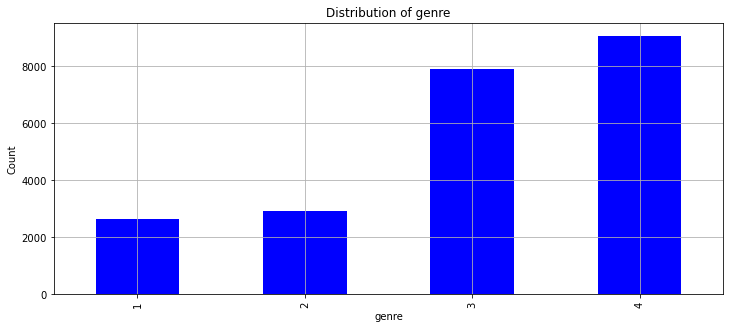

In [8]:
plt.figure(figsize=(12,5))
# sns.countplot(df['Rating'])
df['genre'].value_counts().sort_index().plot(kind='bar',color = 'blue')
plt.title('Distribution of genre')
plt.grid()
plt.xlabel('genre')
plt.ylabel('Count')
ax = plt.axes()
ax.set_facecolor("white")

In [9]:
df = df.sample(frac=0.1, random_state=0) 

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['genre'], \
                                                    test_size=0.1, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_train,y_train

Load 2032 training examples and 226 validation examples. 

Show a review in the training set : 
 , panting through a glaze of clean sweat. Mike and Lorraine smile and look into each other's eyes. The smile slowly disappears. Will they kiss? They're close. Really close. Lips almost touching. Mike tries to muster up the courage, but it's been so long. He can't do it. He lets her up. The floor clears. Exhausted dancers push past them. Forget it. The moment's gone. What the hell. They had a great time. What's the hurry? SOFT CUT TO EXT. LA BREA AVENUE OUTSIDE THE DERBY NIGHT Mike is walking Lorraine to her car. They come upon a parked Escort. LORRAINE Well... This is it. MIKE Listen. I had a great time. LORRAINE Me too. MIKE I would love to see you again sometime. LORRAINE I'll be around. MIKE That's not good enough. I want to make plans to see you. LORRAINE Let me get a pen out of my car. opens the door Do you have something to write on? Mike hands her a business card. LORRAINE looking at

(5762     lly going out? On a school night, no less. Kat...
 6801     ing, but Claudia looks at him so pleadingly an...
 17276    Plissken... CUERVO JONES Do you know what they...
 19303    r and glancing every so often at the clock on ...
 14397    sheer size of this place dwarfs any of the fac...
                                ...                        
 11784    Red Cross. GENERAL MANN Who's the General Dire...
 11547    asant dreams. CHRISTY Wait. No. You're kidding...
 17074    her head How long? LILA Last Friday. She left ...
 5069     TT I have 500 shares of Bryant Utilities that ...
 11249     some of the conflicting views held by many of...
 Name: text, Length: 2032, dtype: object,
 5762     2
 6801     4
 17276    3
 19303    4
 14397    3
         ..
 11784    3
 11547    2
 17074    4
 5069     4
 11249    3
 Name: genre, Length: 2032, dtype: int64)

# Bag of Words
<br>

**Step 1 : Preprocess raw reviews to cleaned reviews**

**Step 2 : Create BoW using CountVectorizer / Tfidfvectorizer in sklearn**

**Step 3 : Transform review text to numerical representations (feature vectors)**

**Step 4 : Fit feature vectors to supervised learning algorithm (eg. Naive Bayes, Logistic regression, etc.)**

**Step 5 : Improve the model performance by GridSearch**

# Text Preprocessing
<br>

**Step 1 : remove html tags using BeautifulSoup**

**Step 2 : remove non-character such as digits and symbols**

**Step 3 : convert to lower case**

**Step 4 : remove stop words such as "the" and "and" if needed**

**Step 5 : convert to root words by stemming if needed**

In [11]:
def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'html.parser').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split() 
    
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]
        
    if stemming==True:

        stemmer = SnowballStemmer('english') 
        words = [stemmer.stem(w) for w in words]
        
    if split_text==True:
        return (words)
    
    return( " ".join(words))

In [12]:
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag
from bs4 import BeautifulSoup 
import logging
from wordcloud import WordCloud
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors

X_train_cleaned = []
X_test_cleaned = []

for d in X_train:
    X_train_cleaned.append(cleanText(d))
print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
for d in X_test:
    X_test_cleaned.append(cleanText(d))

Show a cleaned review in the training set : 
 panting through a glaze of clean sweat mike and lorraine smile and look into each other s eyes the smile slowly disappears will they kiss they re close really close lips almost touching mike tries to muster up the courage but it s been so long he can t do it he lets her up the floor clears exhausted dancers push past them forget it the moment s gone what the hell they had a great time what s the hurry soft cut to ext la brea avenue outside the derby night mike is walking lorraine to her car they come upon a parked escort lorraine well this is it mike listen i had a great time lorraine me too mike i would love to see you again sometime lorraine i ll be around mike that s not good enough i want to make plans to see you lorraine let me get a pen out of my car opens the door do you have something to write on mike hands her a business card lorraine looking at it you re a comedian mike yeah and an actor lorraine i ll have to come see you sometime

## CountVectorizer with Mulinomial Naive Bayes (Benchmark Model)

In [13]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
countVect = CountVectorizer() 
X_train_countVect = countVect.fit_transform(X_train_cleaned)
print("Number of features : %d \n" %len(countVect.get_feature_names())) #6378 
print("Show some feature names : \n", countVect.get_feature_names()[::1000])

Number of features : 22638 

Show some feature names : 
 ['aaaaaaaaaaaaaaaaaaaaaaaaaah', 'assistants', 'blvd', 'cell', 'congressional', 'defends', 'duh', 'fairly', 'gals', 'hating', 'industrial', 'krauts', 'malcolm', 'mouthpieces', 'outcasts', 'poke', 'reassurance', 'safely', 'silly', 'starred', 'teenager', 'ua', 'weirdly']


In [14]:
X_train_countVect.shape,y_train.shape

((2032, 22638), (2032,))

In [15]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE()
# x_train_smote, y_train_smote = smote.fit_sample(X_train_countVect,y_train)
# # from collections import Counter
# # print("Before smote:",Counter(X_train_countVect))
# # print("After smote:",Counter(x_train_smote))

In [16]:
# Train MultinomialNB classifier
mnb = MultinomialNB()
mnb.fit(X_train_countVect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,roc_auc_score
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on validation set: {:.4f}".format(accuracy_score(y_test, predictions)))
    #print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))

In [18]:
predictions = mnb.predict(countVect.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.8053

Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.57      0.72        23
           2       1.00      0.35      0.51        26
           3       0.79      0.88      0.83        80
           4       0.78      0.93      0.85        97

    accuracy                           0.81       226
   macro avg       0.89      0.68      0.73       226
weighted avg       0.83      0.81      0.79       226


Confusion Matrix : 
 [[13  0  6  4]
 [ 0  9  6 11]
 [ 0  0 70 10]
 [ 0  0  7 90]]


In [19]:
import pickle
pickle.dump(mnb,open('Naive_Bayes_model.pkl','wb'))

In [20]:
import pickle
pickle.dump(countVect,open('countVect_Genre.pkl','wb'))

# TfidfVectorizer with Logistic Regression

In [21]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

Number of features : 5428 

Show some feature names : 
 ['00', 'color', 'genius', 'meeting', 'rush', 'tremble']


In [22]:
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
predictions = lr.predict(tfidf.transform(X_test_cleaned))
modelEvaluation(predictions)


Accuracy on validation set: 0.6858

Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.48      0.65        23
           2       0.86      0.23      0.36        26
           3       0.68      0.69      0.68        80
           4       0.65      0.86      0.74        97

    accuracy                           0.69       226
   macro avg       0.80      0.56      0.61       226
weighted avg       0.72      0.69      0.67       226


Confusion Matrix : 
 [[11  0  7  5]
 [ 0  6  6 14]
 [ 0  0 55 25]
 [ 0  1 13 83]]
